<a href="https://colab.research.google.com/github/mimuruth-msft/NLP/blob/main/Text_Classification_1/TextClassification1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset contains the Rating and Review columns, and the prediction task is limited to predicting the rating of a product review based on its text. In other words, the model should be able to predict the numerical rating of a review (1 to 5) based on the text of the review.

   Rating                                             Review
0       2  Stuning even for the non-gamer: This sound tra...
1       2  The best soundtrack ever to anything.: I'm rea...
2       2  Amazing!: This soundtrack is my favorite music...
3       2  Excellent Soundtrack: I truly like this soundt...
4       2  Remember, Pull Your Jaw Off The Floor After He...
(3209, 2)
Bar chart showing the distribution of review sentiments in the dataset.
The X-axis shows the different sentiment categories, and the Y-axis shows the number of reviews that fall into each category.
The bar chart gives a visual representation of the distribution of sentiment categories in the dataset.



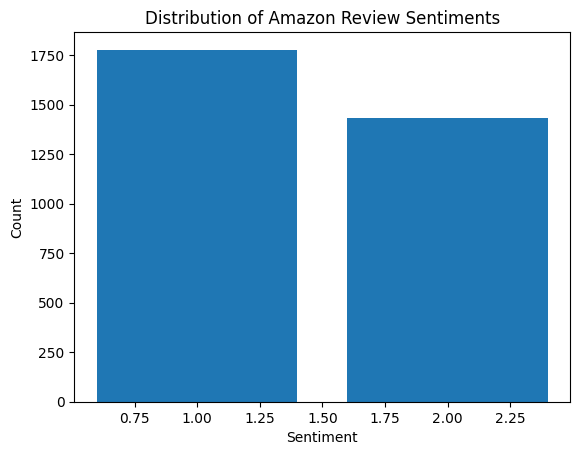

Bar chart showing the distribution of review sentiments in the dataset.
The X-axis shows the different sentiment categories, and the Y-axis shows the number of reviews that fall into each category.
The bar chart gives a visual representation of the distribution of sentiment categories in the dataset.



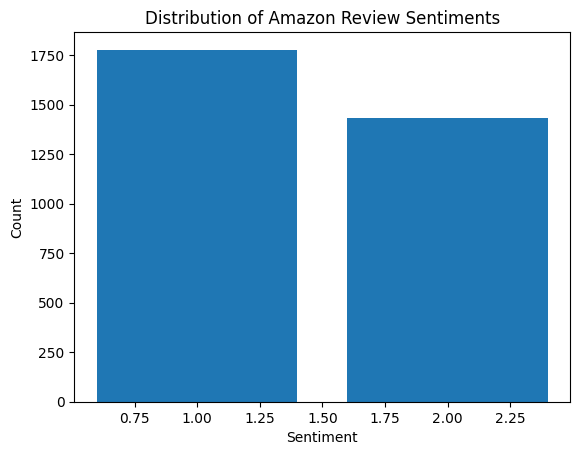

shows a word cloud of frequently used words in reviews of a specified sentiment (positive or negative).
Shows visualization that represents the frequency of words in a text, where the most frequently used words are displayed with a larger font size.
Word cloud of frequently used words in reviews of a specified sentiment (positive or negative)
No positive reviews found.
shows a word cloud of frequently used words in reviews of a specified sentiment (positive or negative).
Shows visualization that represents the frequency of words in a text, where the most frequently used words are displayed with a larger font size.
Word cloud of frequently used words in reviews of a specified sentiment (positive or negative)


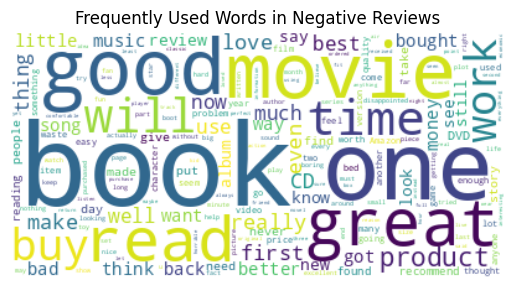

Scatter plot of review length versus sentiment, and a histogram of review lengths.
displays the relationship between review length (X-axis) and sentiment (Y-axis)
where the X-coordinate is the length of the review (in characters) and the Y-coordinate represents the sentiment of the review



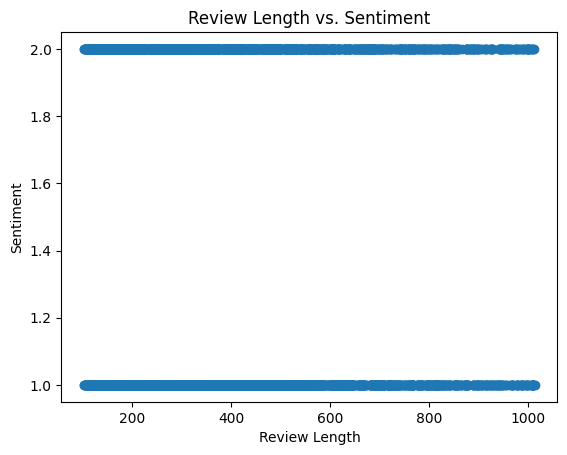

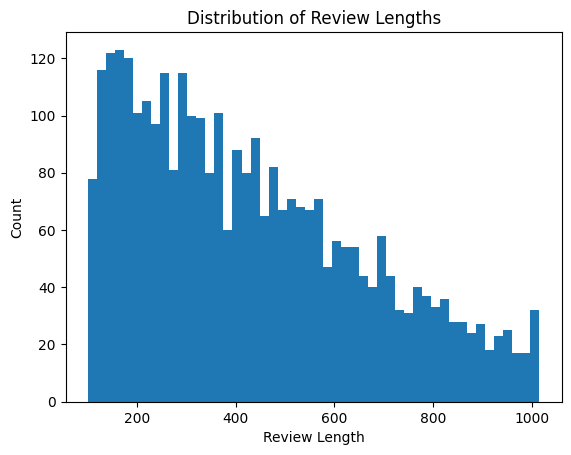


*********************************
Naive Bayes Algorithm
accuracy score:  0.7414330218068536
precision score:  0.6825726141078838
recall score:  0.9619883040935673
f1 score:  0.7985436893203884

*********************************
Logistic Regression Algorithm
accuracy score:  0.8769470404984424
precision score:  0.8902077151335311
recall score:  0.8771929824561403
f1 score:  0.8836524300441826

*********************************
Random Forest Algorithm
accuracy score:  0.7959501557632399
precision score:  0.7712082262210797
recall score:  0.8771929824561403
f1 score:  0.8207934336525308

*********************************
SVM Linear Algorithm
accuracy score:  0.8629283489096573
precision score:  0.845108695652174
recall score:  0.9093567251461988
f1 score:  0.876056338028169

*********************************
SVM Radial Algorithm
accuracy score:  0.5327102803738317
precision score:  0.5327102803738317
recall score:  1.0
f1 score:  0.6951219512195121

*********************************
kera

In [ ]:
import pandas as pd
import nltk
#nltk.download('all')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from nltk.corpus import stopwords

# Program to Classify Amazon Reviews


def pre_process_data():
    # Read csv data in to a pandas Data frame.
    data = pd.read_csv('/content/sample_data/amazon_reviews.csv')
    # Print first five results
    print(data.head())
    print(data.shape)

    # Remove stop words from the data
    stop_words = stopwords.words('english')
    vectorizer = TfidfVectorizer(stop_words=stop_words, binary=True)

    # set up X and y
    X = vectorizer.fit_transform(data.Review)
    y = data.Rating

    # Create a Test/ train set with 80% test and 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

    return X_train, X_test, y_train, y_test



def plot_review_sentiments(file_path):
    """
    Bar chart showing the distribution of review sentiments in the "amazon_reviews.csv" dataset.
    
    """
    # Load the dataset
    df = pd.read_csv(file_path)

    print("Bar chart showing the distribution of review sentiments in the dataset.")
    print("The X-axis represents the possible values for ratings, which are integers from 1 to 5. The Y-axis represents the count of reviews that fall into each rating category.")
    
    # Count the number of reviews in each category
    counts = df['Rating'].value_counts()
    
    # Create a bar chart
    plt.bar(counts.index, counts.values)
    
    # Add labels and title
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title('Distribution of Amazon Review Sentiments')
    
    # Show the graph
    plt.show()


import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_review_sentiments(file_path):
    """
    Bar chart showing the distribution of review sentiments in the "amazon_reviews.csv" dataset.
    """
    # Load the dataset
    df = pd.read_csv(file_path)

    print("Bar chart showing the distribution of review sentiments in the dataset.")
    print("The X-axis shows the different sentiment categories, and the Y-axis shows the number of reviews that fall into each category.") 
    print("The bar chart gives a visual representation of the distribution of sentiment categories in the dataset.\n")
    
    # Count the number of reviews in each category
    counts = df['Rating'].value_counts()
    
    # Create a bar chart
    plt.bar(counts.index, counts.values)
    
    # Add labels and title
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Distribution of Amazon Review Sentiments')
    
    # Show the graph
    plt.show()


def plot_word_cloud(file_path, sentiment):
    """
    Creates a word cloud of frequently used words in reviews of a specified sentiment (positive or negative).
    
    Parameters:
    file_path (str): The file path of the CSV file containing the Amazon reviews dataset.
    sentiment (str): The sentiment to analyze ('positive' or 'negative').
    
    Returns:
    None
    """
    print("shows a word cloud of frequently used words in reviews of a specified sentiment (positive or negative).")
    print("Shows visualization that represents the frequency of words in a text, where the most frequently used words are displayed with a larger font size.")


    # Load the dataset
    df = pd.read_csv(file_path)

    print("Word cloud of frequently used words in reviews of a specified sentiment (positive or negative)")
    
    # Concatenate reviews of the specified sentiment, if any
    if sentiment == 'positive':
        reviews = ' '.join(df[df['Rating'] == 5]['Review'].tolist())
        title = 'Frequently Used Words in Positive Reviews'
    elif sentiment == 'negative':
        reviews = ' '.join(df[df['Rating'] < 4]['Review'].tolist())
        title = 'Frequently Used Words in Negative Reviews'
    else:
        print("Error: Sentiment must be 'positive' or 'negative'.")
        return
    
    # Check if there are any reviews of the specified sentiment
    if len(reviews) == 0:
        print(f"No {sentiment} reviews found.")
        return
    
    # Generate the word cloud
    wordcloud = WordCloud(background_color='white').generate(reviews)
    
    # Plot the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def plot_review_length(file_path):
    """
    Creates a scatter plot of review length versus sentiment, and a histogram of review lengths.
    
    Parameters:
    file_path (str): The file path of the CSV file containing the Amazon reviews dataset.
    
    Returns:
    None
    """

    # Load the dataset
    df = pd.read_csv(file_path)

    print("Scatter plot of review length versus sentiment, and a histogram of review lengths.")
    print("displays the relationship between review length (X-axis) and sentiment (Y-axis)")
    print("where the X-coordinate is the length of the review (in characters) and the Y-coordinate represents the sentiment of the review\n")
    
    # Add a column for review length
    df['Review_Length'] = df['Review'].apply(len)
    
    # Create a scatter plot of review length versus sentiment
    plt.scatter(df['Review_Length'], df['Rating'])
    plt.xlabel('Review Length')
    plt.ylabel('Sentiment')
    plt.title('Review Length vs. Sentiment')
    plt.show()
    
    # Create a histogram of review lengths
    plt.hist(df['Review_Length'], bins=50)
    plt.xlabel('Review Length')
    plt.ylabel('Count')
    plt.title('Distribution of Review Lengths')
    plt.show()




def evaluate_model(model, X_test, y_test):
    # make predictions on the test data
    pred = model.predict(X_test)
    print('accuracy score: ', accuracy_score(y_test, pred))
    print('precision score: ', precision_score(y_test, pred))
    print('recall score: ', recall_score(y_test, pred))
    print('f1 score: ', f1_score(y_test, pred))


def naive_bayes(X_train, X_test, y_train, y_test):
    model = MultinomialNB()
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)


def logistic_regression(X_train, X_test, y_train, y_test):
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)


def random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)


def svm_linear(X_train, X_test, y_train, y_test):
    model = SVC(kernel='linear', degree=8)
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)


def svm_radial(X_train, X_test, y_train, y_test):
    model = SVC(kernel='poly', degree=8)
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)


def keras(X_train, X_test, y_train, y_test):
    pass


if __name__ == "__main__":
    # Read Data and Analyze
    X_train, X_test, y_train, y_test = pre_process_data()

    # Create a graph showing the distribution of the target classes
    plot_review_sentiments('/content/sample_data/amazon_reviews.csv')

    plot_review_sentiments('/content/sample_data/amazon_reviews.csv')
    plot_word_cloud('/content/sample_data/amazon_reviews.csv', 'positive')
    plot_word_cloud('/content/sample_data/amazon_reviews.csv', 'negative')
    plot_review_length('/content/sample_data/amazon_reviews.csv')

    # Step 1: Naive Bayes
    print()
    print("*********************************")
    print("Naive Bayes Algorithm")
    naive_bayes(X_train, X_test, y_train, y_test)

    # Step 2: Logistic Regression
    print()
    print("*********************************")
    print("Logistic Regression Algorithm")
    logistic_regression(X_train, X_test, y_train, y_test)

    # Step 3: Random Forest
    print()
    print("*********************************")
    print("Random Forest Algorithm")
    random_forest(X_train, X_test, y_train, y_test)
    
    # Step 4: SVM Linear Algorithm
    print()
    print("*********************************")
    print("SVM Linear Algorithm")
    svm_linear(X_train, X_test, y_train, y_test)
    
    # Step 4: SVM Radial Algorithm
    print()
    print("*********************************")
    print("SVM Radial Algorithm")
    svm_radial(X_train, X_test, y_train, y_test)
    
    # Step 4: SVM Radial Algorithm
    print()
    print("*********************************")
    print("keras")
    keras(X_train, X_test, y_train, y_test)
    
    print('\nCompleted')